In [89]:
import matplotlib.pyplot as plt
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("KIC 6922244", quarter=4, author="Kepler", cadence="long").download()
#we are looking at a particular star in the 16th quarter(fourth year) of the Kepler mission

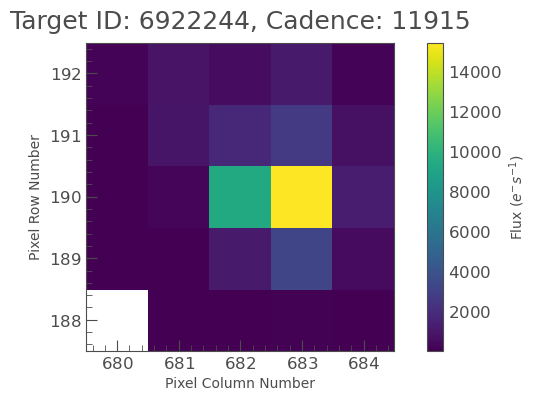

In [90]:
pixelfile.plot(frame=1); #plotting the first frame
plt.show() #showing the first frame image

In [91]:
lc = pixelfile.to_lightcurve(aperture_mask=pixelfile.pipeline_mask)
#taking all the images and converting them into a lightcurve object

In [92]:
lc #checking if object lc exists

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
352.37632485035283,43689.1484375,6.631562232971191,682.6803253766153,190.0726135828141,11914,0
352.3967580484896,43698.078125,6.631830215454102,682.679939392134,190.0724388237138,11915,8192
352.4376244455707,43694.10546875,6.6317877769470215,682.6796255144184,190.07267575992847,11917,16
352.45805764463876,43698.31640625,6.631948947906494,682.6797879974883,190.07249571597706,11918,0
352.4784908439324,43687.6484375,6.631504535675049,682.6792868410989,190.07246464783114,11919,0
352.4989240434661,43686.4765625,6.6314263343811035,682.6797248240034,190.07284002730125,11920,0
352.5193572433491,43692.59375,6.631662845611572,682.6797061866289,190.07275265635383,11921,0
352.53979034345684,43712.01953125,6.6356940269470215,682.6787299772047,190.07316832254241,11922,128


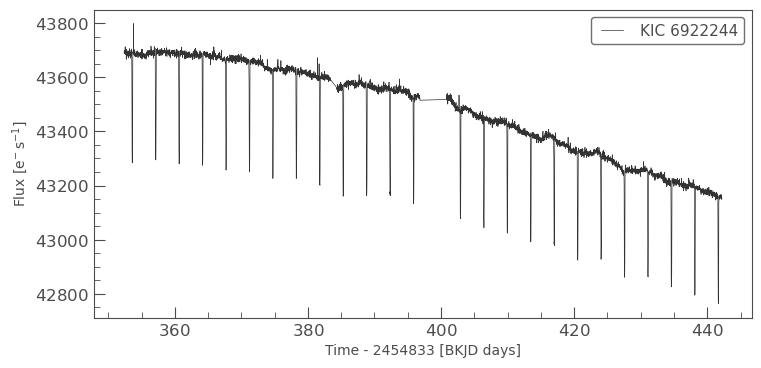

In [93]:
lc.plot();
plt.show() #showing the actual lightcurve plot

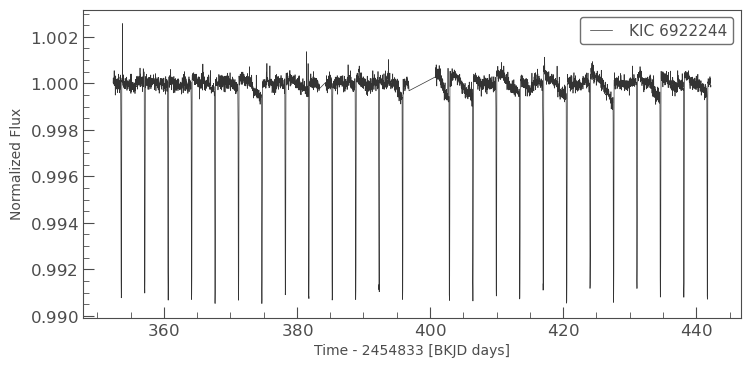

In [94]:
flat_lc = lc.flatten(window_length=401) #flattening the curve and storing it another object to make analysis easier
flat_lc.plot();
plt.show()

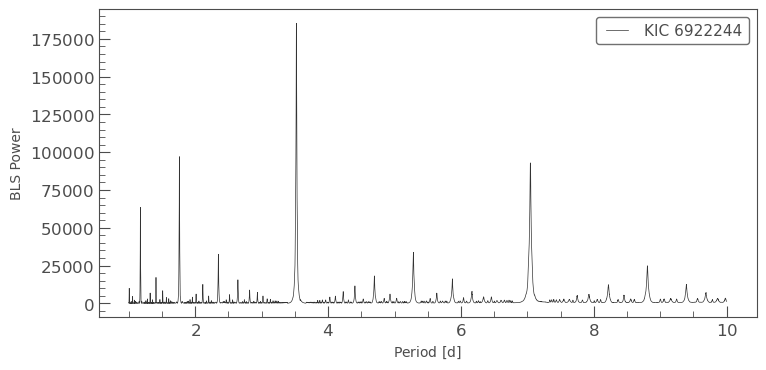

In [95]:
#as we can clearly see, the normalized flux of the light from the star periodically dips.
#which tells us that a planet is orbiting the star
# now we need to evaluate the periodicity of the dips in the lightcurve
#to do this, we use a periodogram which gives us the frequencies for which the periodicity is the best
import numpy as np
periodogram = flat_lc.to_periodogram(method='bls', period=np.arange(1, 10, 0.001))
periodogram.plot();
plt.show()

In [96]:
#to evaluate the best frequency, we do the following
best_fit_period = periodogram.period_at_max_power
print("best fit period: {:.5f}".format(best_fit_period))

best fit period: 3.52200 d


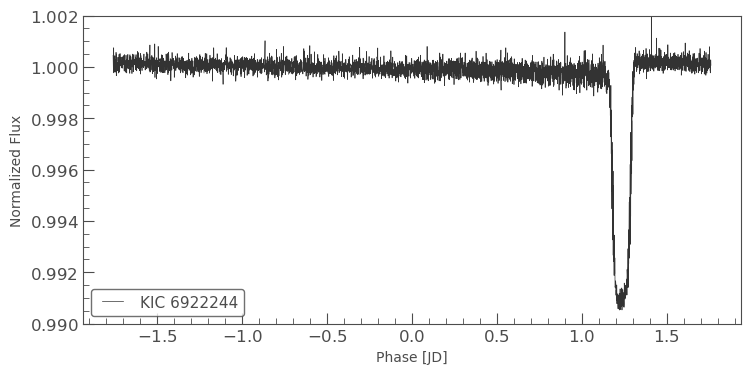

In [97]:
#now that we have got our best fit period, we fold our periodic light curve, onto each other
#we do this to get a clear picture of the transit\
folded_lc = flat_lc.fold(period=best_fit_period)
folded_lc.plot();
plt.ylim([0.990, 1.002]) # this is to get a clear picture of the transit
plt.show()

C:\Users\tripa\AppData\Local\Temp\ipykernel_9124\3127897065.py:3: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=15)


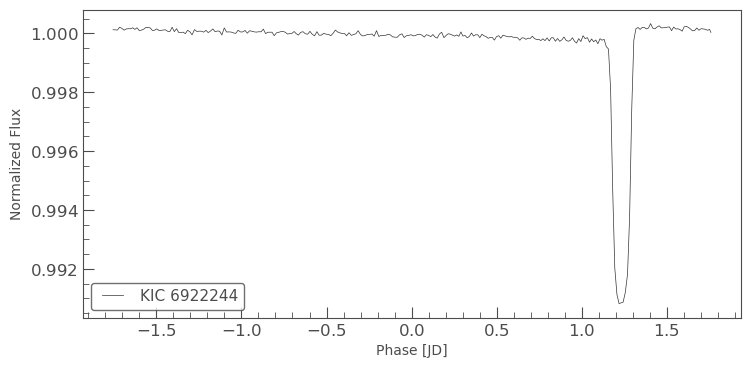

In [98]:
#as we can see, there is a lot of noise in this graph
# to reduce the noise, we do the following
binned_lc = folded_lc.bin(binsize=15)
binned_lc.plot();
plt.show()

C:\Users\tripa\AppData\Local\Temp\ipykernel_9124\412051697.py:2: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=15).plot();


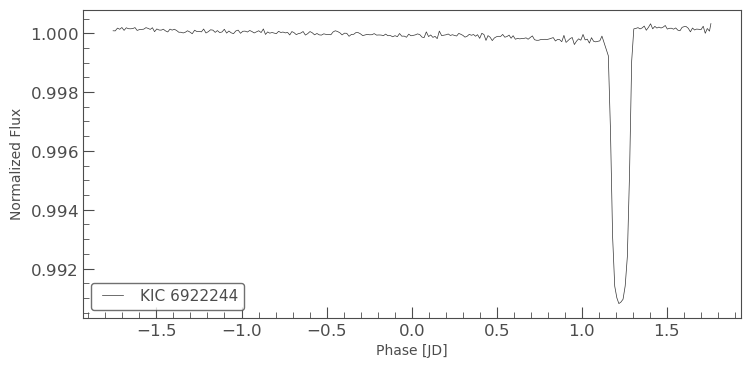

In [88]:
#we can execute all the above given functions using a single line of code also
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=15).plot();
plt.show()